<a href="https://colab.research.google.com/github/Aman007Agg/pytorch_deep_learniing/blob/main/01_pytorch_workflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow.

Resources:
* Ground truth notebook- https://github.com/mrdbourke/pytorch-deep-learning/blob/main/docs/01_pytorch_workflow.ipynb
* Code notebook- https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow
* Ask a question - https://github.com/mrdbourke/pytorch-deep-learning/discussions



In [277]:
what_we_are_covering ={1: "data (prepare and load)",
                       2: "build model",
                       3: "fitting the model to data (training)",
                       4: "making predictions and evaluating a model (interference)",
                       5: "saving and loading a model",
                       6: "putting it all together"}

what_we_are_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (interference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [278]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neaural netwrorks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__


'2.5.1+cu121'

## 1. Data (Preparing and Loading)

Data can be almost anything ... in machine learning
* Excel Spreadsheet
* Images of any Kind
* Videos (YouTube has lots of data..)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this , let's create some *known* data using linear regression formula.

we'll use a linear regression formula to make a straight line with *known* parameters.


In [279]:
# Create *known* parameters (y = mX + c)
weight = 0.7 # represent -> (m)
bias = 0.3 # represent -> (c)

# Create
start = 0
end=1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y), X.shape, y.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50,
 torch.Size([50, 1]),
 torch.Size([50, 1]))

### Splitting Data into Training and Test Sets (One of the most important concept in machine learning in general)

Let's create a training and test set with our data.


In [280]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [281]:
X_train , y_train, X_train.shape, y_train.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

# Building a function to visualize our data
How might we better visualize our data?
This is where the data explorer's motto comes in!

Visualize! Visualize! Visualize!


In [282]:
def plot_predictions(train_data= X_train,
                     train_labels= y_train,
                     test_data = X_test,
                     test_labels= y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size":14});



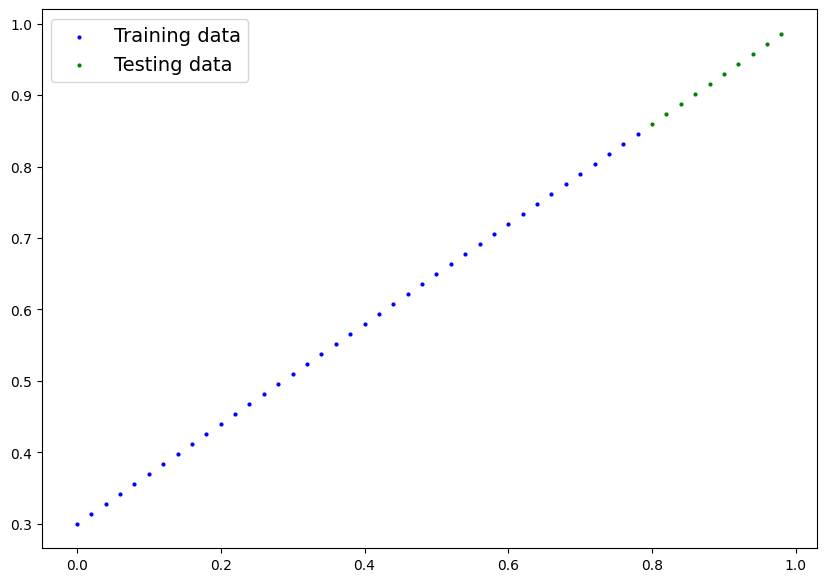

In [283]:
plot_predictions();

## 2. Building our first pytorch model (Build Model)

Because we are going to be building classes throughout the course.
Recommendation to familiar with OOPs concepts: https://realpython.com/python3-object-oriented-programming/

What our model does:
* start with random values, (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (weight and bias value we used to create the data).

How does it do so?

Through two main algorithms:
  * 1. Gradient Descent - https://youtu.be/IHZwWFHWa-w

  * 2. BackPropagation - https://youtu.be/IIg3gGewQ5U





In [284]:
from torch import nn

# Create Linear regression Model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
  def __init__(self): # constructor
    super().__init__()
    # Initialize model parameters
    self.weights =nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
                                          requires_grad=True, # <- could this parameter be updated via gradient descent?
                                          dtype=torch.float)) # <- Pytorch by defaults datatype -> torch.float32
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forwards method to define the computation in the model.
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (training data)
    return self.weights * x + self.bias # <- prediction = weights * data + bias , This is the Linear regression model






### PyTorch model building essentials

* torch.nn - contains all of the building blocks for computational graphs (a neural networks can be considered as a computational graph)
* torch.nn.Parameter - what parameter should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all the neural network module, if its subclass it, you should override Forward
* torch.optim - this where the optimizers in Pytorch live, they will help with gradient descent.
* def forward() - All nn.Module subclass require you to override forward().

See more of the essentials modules via the PyTorch cheatsheet - https://pytorch.org/tutorials/beginner/ptcheat.html


### Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside..

So we can check our model parameters or what's inside our model using  .parameters()

In [285]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is subclass of the nn.Module)
model_0 = LinearRegressionModel()

# Checkout the parameters
list(model_0.parameters())




[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [286]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [287]:
weight , bias # Idea; vaues that we defined at the start

(0.7, 0.3)

### Making Predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

When we pass data through our model it is going to run it through the forward() method.



In [288]:
# Make predicitions with model
# with torch.no_grad():
#   y_preds = model_0(X_test)

# You can also do something similar with torch.no_grad(), however inference_mode is preffered.
with torch.inference_mode(): # context manager
  y_preds = model_0(X_test)

y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

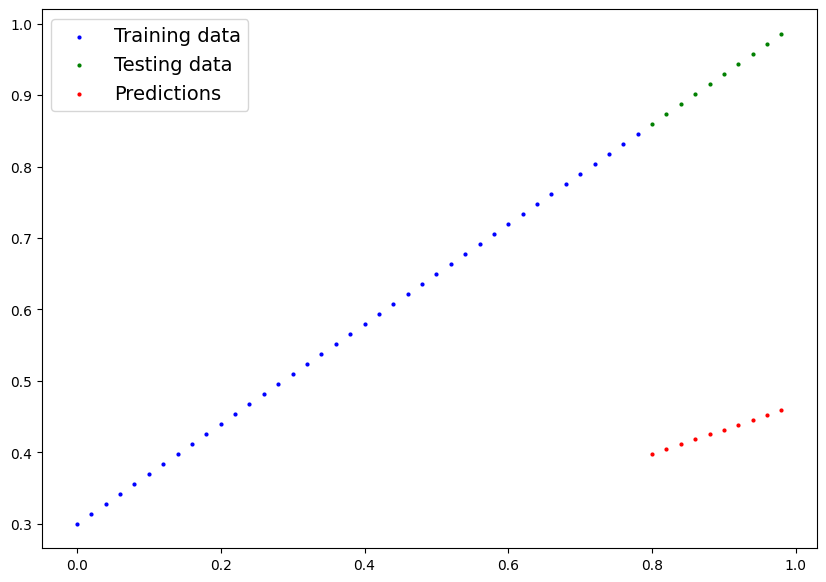

In [289]:
plot_predictions(predictions = y_preds)

## 3. Training Model

The Whole Idea of training is for a model to move from *unknown* parameters (these may be random) to some *known* parameters.
or in the other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your model predictions are - is to use loss functions.

Note: Loss Functions may also be called cost functions or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* ** Loss Function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
   
* ** Optimizer:** Takes into account the loss of a model and adjusts the models parameters (e.g. weight & bias)
  * Inside the optimizer you'll often have to set two paramters:
    * 1. `params`- the model parameters you would like to optimize, for example params= `model_0.parameters()`
    * 2. `lr`(learning rate)- the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr` results in large changes.

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [290]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [291]:
model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

**Q** Which loss function and optimizer should i use?

**A** This will be problem specific. But with experience , you will get an idea of what works and what doesn't with your particular problem set.

For example, for a regression (like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifying wheter a photo is of a dog or a cat, you will likely want to use a loss function of `nn.BCELoss()` (binary Classification) known as `(binary cross entropy loss)`





In [292]:
# Setup a Loss Function
loss_fn = nn.L1Loss()
# loss_fn -> L1Loss() it gives Mean Absolute Error(MAE)

# Setup a optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate = possibly the most important hyperparameter you can set


### Building a training loop and a testing loop in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()`)- to make predicitons on data-also called forward propagation
2. Calculate the loss(compare forward pass predicitons to ground truth labels)
3. Optimizer zero grad
4. Loss backward- move backwards through the neural network to calculate the gradients of each of the parameters of our model with respect to the loss.(** backpropagation**)
5. optimizer step- use the optimizer to adjust our model's  parameters to try and improve the loss (**gradient descent**)


In [293]:
# An epochs is one loop through the data..(this is a hyperparameter) because we have set this is our own.
epochs = 168 # test with epochs 100 and check number of loss value
            # with 200 or (165-170) epochs the red dots value are almost on the top of green values(near to the actual test values)

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []



### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training model
  model_0.train() # train mode in PyTorch sets all paramters that requires gradient to require gradients.

  # 1. Forward pass- on train data using the forward() method inside
  y_pred = model_0(X_train)

  # 2. calculate the loss (how different are the model's predictions to the true values)
  loss = loss_fn(y_pred, y_train)
  print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform Backpropogation on the loss with respect to the parameters of the model
  # (Loss backward)
  loss.backward()

  # 5. Optimizer step
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to  zero them above in step 3

  ### Testing
  model_0.eval() # turns off gradient tracking
  # testing - turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes.
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
      # Print out model state_dict()
      print(model_0.state_dict())

  # Print out model state_dict()
  #print(model_0.state_dict())


Loss: 0.31288138031959534
Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.3013603389263153
Loss: 0.28983935713768005
Loss: 0.2783183455467224
Loss: 0.26679736375808716
Loss: 0.2552763521671295
Loss: 0.24375534057617188
Loss: 0.23223432898521423
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713240146637
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Loss: 0.18615034222602844
Loss: 0.1746293306350708
Loss: 0.16310831904411316
Loss: 0.1515873372554779
Loss: 0.14006635546684265
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681284427642822
Loss: 0.08908725529909134
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Loss: 0.08227583020925522
Loss: 0

In [294]:
epoch_count, loss_values, test_loss_values

([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160],
 [tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>),
  tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>)],
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.

In [295]:
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy()), test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178], dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082)])

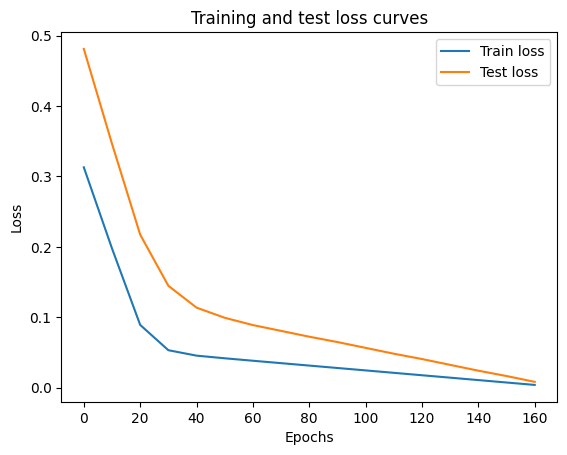

In [296]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [297]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [298]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6947])), ('bias', tensor([0.3028]))])

In [299]:
weight, bias # true values

(0.7, 0.3)

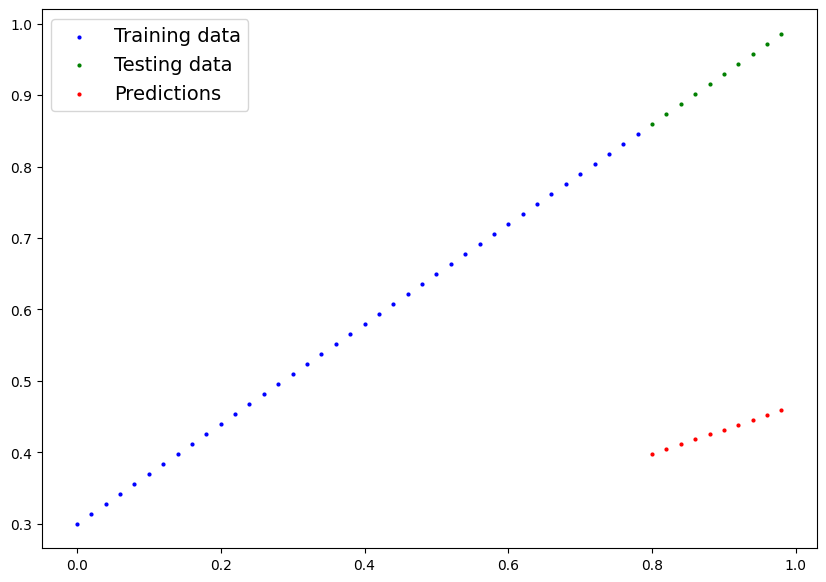

In [300]:
plot_predictions(predictions=y_preds)

OrderedDict([('weights', tensor([0.6947])), ('bias', tensor([0.3028]))])

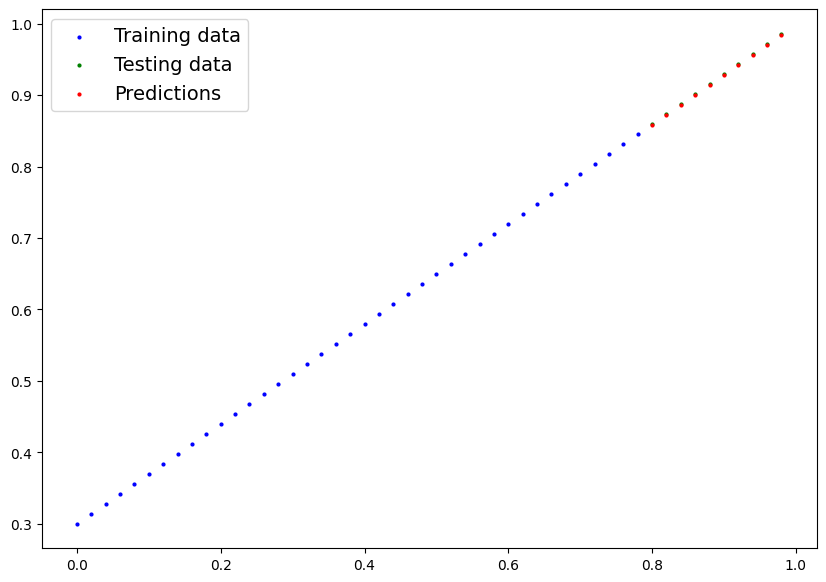

In [301]:
plot_predictions(predictions=y_preds_new)
model_0.state_dict()

## Saving a model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch.

1. `torch.save()`- allows you save a PyTorch object in PyThons's pickle format.

2. `torch.load()`- allows you to load a saved Pytorch object

3. `torch.nn.Module.load_state_dict()`- this allows you to load a model's saved state dictionary

you can read the details - https://pytorch.org/tutorials/beginner/saving_loading_models.html


In [302]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6947])), ('bias', tensor([0.3028]))])

In [303]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_workflow_model_0.pth


In [304]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Jan 24 02:41 01_pytorch_workflow_model_0.pth


## Loading a Pytorch model

Since we saved our models `state_dict()`  rather the entore model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [305]:
# To load in a saved state_dict we have to instantiate a new instance of  our model class

loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated paramters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-305-7690712ba72b>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [306]:
# cheeck the values
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6947])), ('bias', tensor([0.3028]))])

In [307]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds


tensor([[0.8586],
        [0.8725],
        [0.8864],
        [0.9003],
        [0.9142],
        [0.9281],
        [0.9420],
        [0.9559],
        [0.9698],
        [0.9837]])

In [308]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8586],
        [0.8725],
        [0.8864],
        [0.9003],
        [0.9142],
        [0.9281],
        [0.9420],
        [0.9559],
        [0.9698],
        [0.9837]])

In [309]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

##6. Putting it all together

Let's go back through the steps above and see it all in one place.


In [310]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check python version
torch.__version__

'2.5.1+cu121'

Create device-agnostic code.
This means if we've got access to a GPU, our code will use it (for potentially faster computing).

In [311]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### 6.1 Data

In [312]:
# Create some data using the linear regression formula of y= weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start =0
end =1
step = 0.02

# Create X and y (freatures and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [313]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

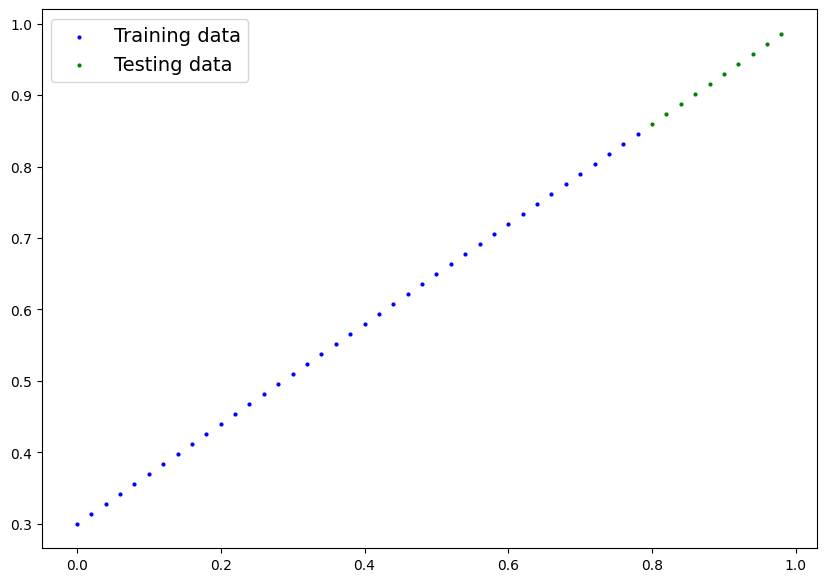

In [314]:
# Plot the data
# Note: if you don't have the plot_predictions() function loaded, this will error
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a PyTorch Linear Model
important links - https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
    
    

In [315]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters / also called : linear transform, fully connected layer
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)

# Create an instance of the model
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [316]:
# check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [317]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For Training we need:
* Loss Function
* Optimizer
* Training Loop
* Testing Loop

In [318]:
# Setup the loss function
loss_fn = nn.L1Loss()

# Setup the optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [319]:
# Let's write a training loop
torch.manual_seed(42)

# Set the number of epochs
epochs = 200

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_pred = model_1(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

    # Print out what's happeing
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416

In [320]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [321]:
weight, bias

(0.7, 0.3)

### 6.4 Making and Evaluating predictions

In [322]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

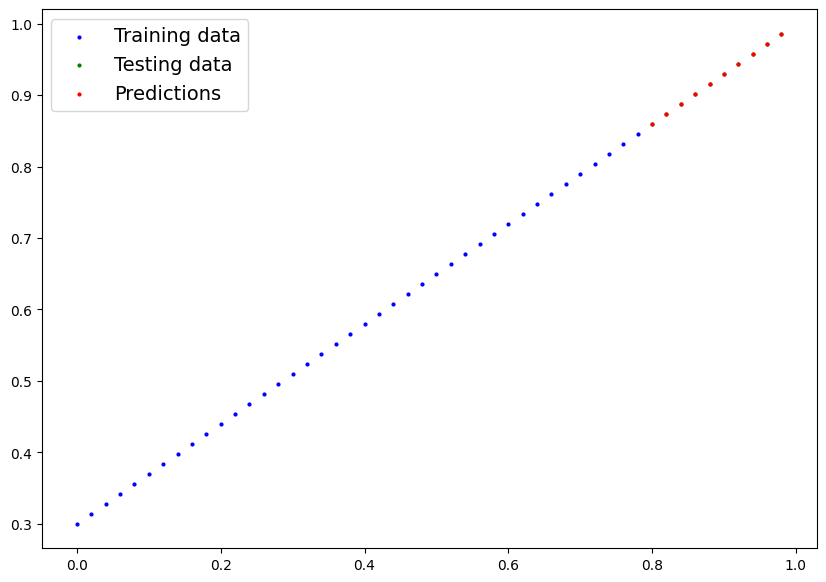

In [323]:
# check out our model predictions visually
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving and loading and Training model

In [324]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [326]:
# Load a PyTorch

# Create a new instance of linear regression model v2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_state_dict
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# put the loaded model to device
loaded_model_1.to(device)

<ipython-input-326-5c1917b764ad>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [327]:
# Evaluate the loaded model
loaded_model_1.eval()

# Make some predictions
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

## Exercises & Extra-curriculam

For Exercises and Extracurriculam refer to - https://www.learnpytorch.io/01_pytorch_workflow/